Link to dataset: https://data.cdc.gov/NCHS/Conditions-contributing-to-deaths-involving-corona/hk9y-quqm 

## This is a quick notebook tutorial on how to use Python to access the above CDC dataset.

In [7]:
#import libraries

import pandas as pd
from sodapy import Socrata #used for interacting with SODA API

In [6]:
help(Socrata) #show all the stuff you can do with Socrata class

Help on class Socrata in module sodapy.socrata:

class Socrata(builtins.object)
 |  Socrata(domain, app_token, username=None, password=None, access_token=None, session_adapter=None, timeout=10)
 |  
 |  The main class that interacts with the SODA API. Sample usage:
 |      from sodapy import Socrata
 |      client = Socrata("opendata.socrata.com", None)
 |  
 |  Methods defined here:
 |  
 |  __enter__(self)
 |      This runs as the with block is set up.
 |  
 |  __exit__(self, exc_type=None, exc_value=None, traceback=None)
 |      This runs at the end of a with block. It simply closes the client.
 |      
 |      Exceptions are propagated forward in the program as usual, and
 |          are not handled here.
 |  
 |  __init__(self, domain, app_token, username=None, password=None, access_token=None, session_adapter=None, timeout=10)
 |      The required arguments are:
 |          domain: the domain you wish you to access
 |          app_token: your Socrata application token
 |      Sim

In [14]:
#define important variables
DATASET_ID = 'hk9y-quqm'
APP_TOKEN = None

#create an interface to the cdc website, to access datasets
client = Socrata('data.cdc.gov', APP_TOKEN)

## Querying with SODA API
For tags to query by, see the CDC API here: https://dev.socrata.com/foundry/data.cdc.gov/hk9y-quqm

For documentation on SQL-like querying, see here: https://dev.socrata.com/docs/queries/

In [71]:
#an example query to the dataset
#by default, returns a list of dictionaries, where length of list == limit argument
#this query gets 25 recent data points taken from the USA
results = client.get(DATASET_ID, state = 'US', limit = 100)
results

[{'data_as_of': '2020-10-25T00:00:00.000',
  'start_week': '2020-02-01T00:00:00.000',
  'end_week': '2020-10-24T00:00:00.000',
  'state': 'US',
  'condition_group': 'Respiratory diseases',
  'condition': 'Influenza and pneumonia',
  'icd10_codes': 'J09-J18',
  'age_group': '0-24',
  'number_covid19_deaths': '156'},
 {'data_as_of': '2020-10-25T00:00:00.000',
  'start_week': '2020-02-01T00:00:00.000',
  'end_week': '2020-10-24T00:00:00.000',
  'state': 'US',
  'condition_group': 'Respiratory diseases',
  'condition': 'Influenza and pneumonia',
  'icd10_codes': 'J09-J18',
  'age_group': '25-34',
  'number_covid19_deaths': '752'},
 {'data_as_of': '2020-10-25T00:00:00.000',
  'start_week': '2020-02-01T00:00:00.000',
  'end_week': '2020-10-24T00:00:00.000',
  'state': 'US',
  'condition_group': 'Respiratory diseases',
  'condition': 'Influenza and pneumonia',
  'icd10_codes': 'J09-J18',
  'age_group': '35-44',
  'number_covid19_deaths': '1915'},
 {'data_as_of': '2020-10-25T00:00:00.000',
  '

In [73]:
#convert this list into a Pandas DataFrame
results_df = pd.DataFrame.from_records(results) #convert list of dictionaries into DataFrame
results_df

,data_as_of,start_week,end_week,state,condition_group,condition,icd10_codes,age_group,number_covid19_deaths
0,2020-10-25T00:00:00.000,2020-02-01T00:00:00.000,2020-10-24T00:00:00.000,US,Respiratory diseases,Influenza and pneumonia,J09-J18,0-24,156
1,2020-10-25T00:00:00.000,2020-02-01T00:00:00.000,2020-10-24T00:00:00.000,US,Respiratory diseases,Influenza and pneumonia,J09-J18,25-34,752
2,2020-10-25T00:00:00.000,2020-02-01T00:00:00.000,2020-10-24T00:00:00.000,US,Respiratory diseases,Influenza and pneumonia,J09-J18,35-44,1915
3,2020-10-25T00:00:00.000,2020-02-01T00:00:00.000,2020-10-24T00:00:00.000,US,Respiratory diseases,Influenza and pneumonia,J09-J18,45-54,5391
4,2020-10-25T00:00:00.000,2020-02-01T00:00:00.000,2020-10-24T00:00:00.000,US,Respiratory diseases,Influenza and pneumonia,J09-J18,55-64,12955
...,...,...,...,...,...,...,...,...,...
95,2020-10-25T00:00:00.000,2020-02-01T00:00:00.000,2020-10-24T00:00:00.000,US,Circulatory diseases,Cardiac arrhythmia,"I44, I45, I47-I49",65-74,2495
96,2020-10-25T00:00:00.000,2020-02-01T00:00:00.000,2020-10-24T00:00:00.000,US,Circulatory diseases,Cardiac arrhythmia,"I44, I45, I47-I49",75-84,4065
97,2020-10-25T00:00:00.000,2020-02-01T00:00:00.000,2020-10-24T00:00:00.000,US,Circulatory diseases,Cardiac arrhythmia,"I44, I45, I47-I49",85+,5559
98,2020-10-25T00:00:00.000,2020-02-01T00:00:00.000,2020-10-24T00:00:00.000,US,Circulatory diseases,Cardiac arrhythmia,"I44, I45, I47-I49",Not stated,0


In [101]:
#can also query using SQL-like syntax
results = client.get(DATASET_ID,
                     select = ' state, condition, number_covid19_deaths, age_group ',
                     where = 'number_covid19_deaths > 200 and state in ("CA", "US") ',
                     limit = 100)
results_df = pd.DataFrame.from_records(results)
results_df

,state,condition,number_covid19_deaths,age_group
0,CA,Influenza and pneumonia,253,35-44
1,CA,Influenza and pneumonia,671,45-54
2,CA,Influenza and pneumonia,1444,55-64
3,CA,Influenza and pneumonia,2051,65-74
4,CA,Influenza and pneumonia,2062,75-84
...,...,...,...,...
95,US,Influenza and pneumonia,752,25-34
96,US,Influenza and pneumonia,1915,35-44
97,US,Influenza and pneumonia,5391,45-54
98,US,Influenza and pneumonia,12955,55-64


       number_covid19_deaths
state                       
CA                    137288
US                     42165


<AxesSubplot:xlabel='state'>

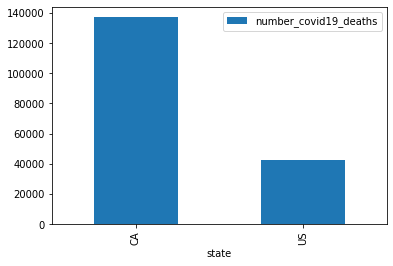

In [108]:
#now do some cool stuff with Pandas

results_df['number_covid19_deaths'] = results_df['number_covid19_deaths'].astype(int) #make sure that this column is numeric data
covid_deaths_df = results_df.groupby('state').agg({'number_covid19_deaths': 'sum'})

print(covid_deaths_df)

covid_deaths_df.plot(y = 'number_covid19_deaths', kind = 'bar')